# Cloud Natural Language API: Qwik Start

GSP097

https://www.cloudskillsboost.google/focuses/582?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

## Overview
Cloud Natural Language API lets you extract information about people, places, events, (and more) mentioned in text documents, news articles, or blog posts. You can use it to understand sentiment about your product on social media, or parse intent from customer conversations happening in a call center or a messaging app. You can even upload text documents for analysis.

## Cloud Natural Language API features

**Syntax Analysis**: Extract tokens and sentences, identify parts of speech (PoS) and create dependency parse trees for each sentence.

**Entity Recognition**: Identify entities and label by types such as person, organization, location, events, products and media.

**Sentiment Analysis**: Understand the overall sentiment expressed in a block of text.

**Content Classification**: Classify documents in predefined 700+ categories.

**Multi-Language**: Enables you to easily analyze text in multiple languages including English, Spanish, Japanese, Chinese (Simplified and Traditional), French, German, Italian, Korean and Portuguese.

**Integrated REST API**: Access via REST API. Text can be uploaded in the request or integrated with Cloud Storage.

In this lab you'll use the `analyze-entities` method to ask the Cloud Natural Language API to extract "entities" (e.g. people, places, and events) from a snippet of text.

# Create an API Key

First, you will set an environment variable with your PROJECT_ID which you will use throughout this codelab:

In [ ]:
export GOOGLE_CLOUD_PROJECT=$(gcloud config get-value core/project)

Next, create a new service account to access the Natural Language API:

In [ ]:
gcloud iam service-accounts create my-natlang-sa \
  --display-name "my natural language service account"

Then, create credentials to log in as your new service account. 

Create these credentials and save it as a JSON file "~/key.json" by using the following command:

In [ ]:
gcloud iam service-accounts keys create ~/key.json \
  --iam-account my-natlang-sa@${GOOGLE_CLOUD_PROJECT}.iam.gserviceaccount.com

Finally, set the `GOOGLE_APPLICATION_CREDENTIALS` environment variable. The environment variable should be set to the full path of the credentials JSON file you created, which you can see in the output from the previous command:

In [ ]:
export GOOGLE_APPLICATION_CREDENTIALS="/home/USER/key.json"

# Make an Entity Analysis Request

In order to perform next steps please connect to the instance provisioned for you via ssh. Open the navigation menu and select `Compute Engine`. You should see the following provisioned linux instance. Click on the `SSH` button. You will be brought to an interactive shell.

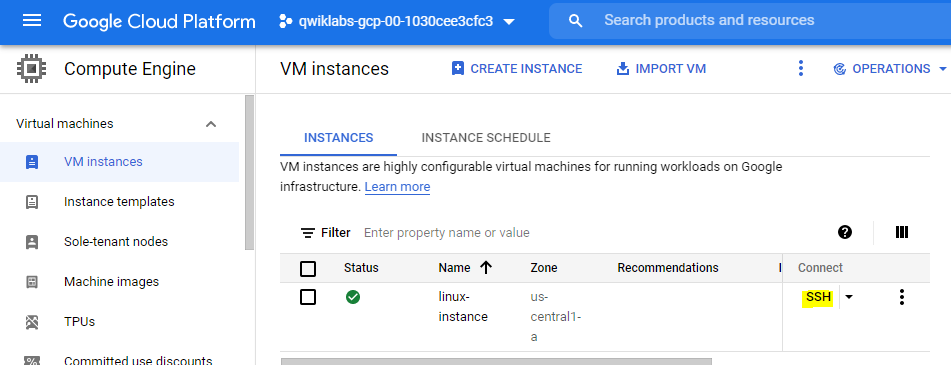

Now you'll try out the Natural Language API's entity analysis with the following sentence:

`Michelangelo Caravaggio, Italian painter, is known for 'The Calling of Saint Matthew'`

Run the following `gcloud` command:

In [ ]:
gcloud ml language analyze-entities --content="Michelangelo Caravaggio, Italian painter, is known for 'The Calling of Saint Matthew'." > result.json

Run the below command to preview the output of `result.json` file.

In [ ]:
cat result.json

You should see a response similar to the following in the `result.json` file:

In [ ]:
{
  "entities": [
    {
      "name": "Michelangelo Caravaggio",
      "type": "PERSON",
      "metadata": {
        "wikipedia_url": "http://en.wikipedia.org/wiki/Caravaggio",
        "mid": "/m/020bg"
      },
      "salience": 0.83047235,
      "mentions": [
        {
          "text": {
            "content": "Michelangelo Caravaggio",
            "beginOffset": 0
          },
          "type": "PROPER"
        },
        {
          "text": {
            "content": "painter",
            "beginOffset": 33
          },
          "type": "COMMON"
        }
      ]
    },
    {
      "name": "Italian",
      "type": "LOCATION",
      "metadata": {
        "mid": "/m/03rjj",
        "wikipedia_url": "http://en.wikipedia.org/wiki/Italy"
      },
      "salience": 0.13870546,
      "mentions": [
        {
          "text": {
            "content": "Italian",
            "beginOffset": 25
          },
          "type": "PROPER"
        }
      ]
    },
    {
      "name": "The Calling of Saint Matthew",
      "type": "EVENT",
      "metadata": {
        "mid": "/m/085_p7",
        "wikipedia_url": "http://en.wikipedia.org/wiki/The_Calling_of_St_Matthew_(Caravaggio)"
      },
      "salience": 0.030822212,
      "mentions": [
        {
          "text": {
            "content": "The Calling of Saint Matthew",
            "beginOffset": 69
          },
          "type": "PROPER"
        }
      ]
    }
  ],
  "language": "en"
}

Read through your results. For each "entity" in the response, you'll see:

- The entity `name` and `type`, a person, location, event, etc.
- `metadata`, an associated Wikipedia URL if there is one.
- `salience`, and the indices of where this entity appeared in the text. Salience is a number in the [0,1] range that refers to the centrality of the entity to the text as a whole.
- `mentions`, which is the same entity mentioned in different ways.

You've sent your first request to the Cloud Natural Language API.

Below are screenshots of executing all the above commands.

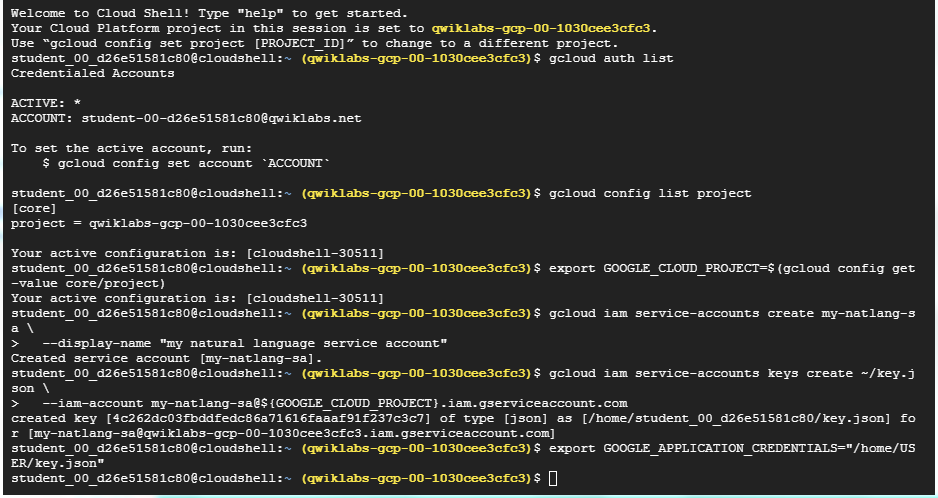

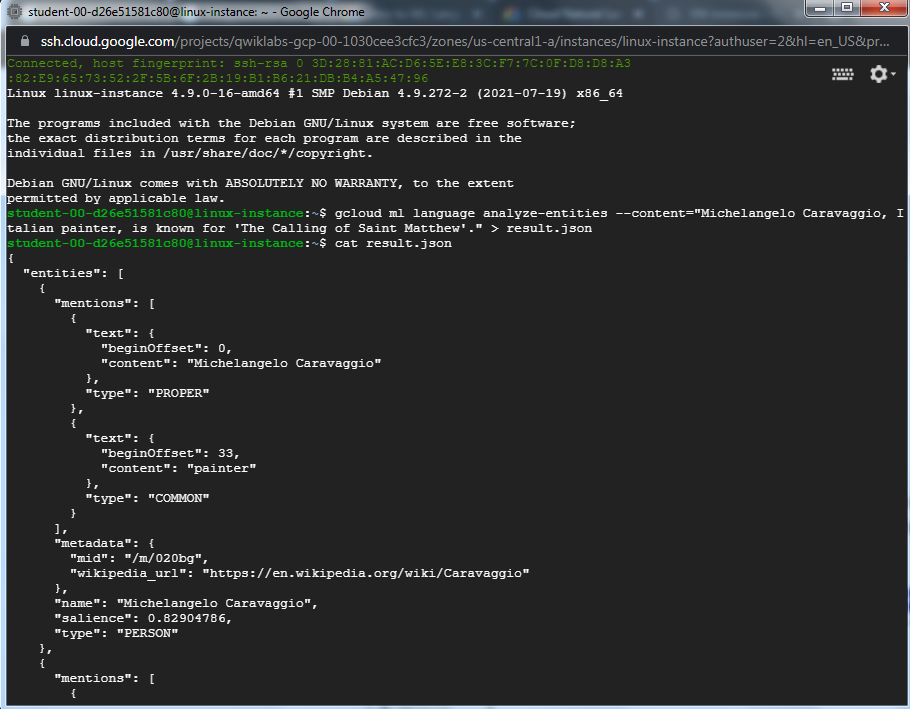